In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf


In [3]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['sample_crop_production.csv']))
df.head()


Saving sample_crop_production.csv to sample_crop_production.csv


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Odisha,Cuttack,2021,Kharif,Rice,1200,3600
1,Odisha,Cuttack,2022,Kharif,Rice,1350,4000
2,Odisha,Puri,2022,Rabi,Wheat,1100,2500
3,Maharashtra,Nagpur,2021,Kharif,Cotton,2000,3000
4,Maharashtra,Mumbai,2022,Rabi,Wheat,1800,2600


In [4]:
df.dropna(inplace=True)
df = df[df['Production'] > 0]

# Encode categorical values (like State, Crop)
df_encoded = pd.get_dummies(df, columns=['State_Name', 'Crop'])

X = df_encoded.drop(['Production'], axis=1)
y = df_encoded['Production']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))


ValueError: could not convert string to float: 'Ludhiana'

In [6]:
# Drop unnecessary non-numeric columns if any
df = df.drop(['District_Name'], axis=1)  # Optional: keep only relevant columns

# Convert categorical columns to one-hot encoding
df_encoded = pd.get_dummies(df, columns=['State_Name', 'Season', 'Crop'])

# Split features and target
X = df_encoded.drop(['Production'], axis=1)
y = df_encoded['Production']

# Now split into train-test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: -5.591931766375011


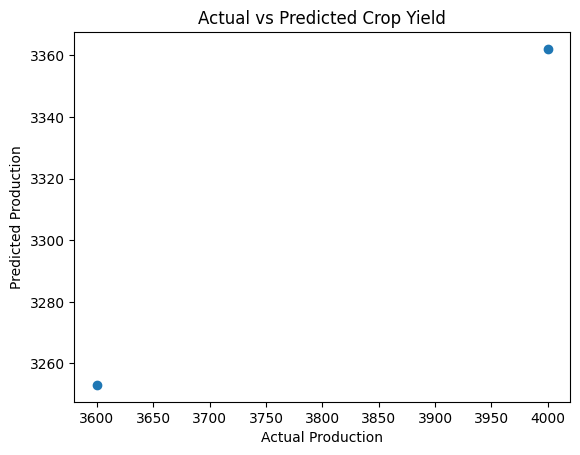

In [8]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title("Actual vs Predicted Crop Yield")
plt.show()


In [10]:
import pandas as pd
import random

states = ['Odisha', 'Punjab', 'Maharashtra', 'Gujarat', 'Tamil Nadu']
districts = ['Cuttack', 'Ludhiana', 'Nagpur', 'Surat', 'Chennai']
seasons = ['Kharif', 'Rabi']
crops = ['Rice', 'Wheat', 'Cotton', 'Maize', 'Sugarcane']

data = []

for _ in range(100):
    state = random.choice(states)
    district = random.choice(districts)
    year = random.choice([2020, 2021, 2022])
    season = random.choice(seasons)
    crop = random.choice(crops)
    area = random.randint(1000, 5000)  # in hectares
    production = area * random.uniform(2.5, 4.5)  # in metric tons

    data.append([state, district, year, season, crop, area, round(production)])

df = pd.DataFrame(data, columns=['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area', 'Production'])

In [11]:
df.to_csv("synthetic_crop_production.csv", index=False)

In [12]:
df.drop(['District_Name'], axis=1, inplace=True)  # optional
df_encoded = pd.get_dummies(df, columns=['State_Name', 'Season', 'Crop'])

X = df_encoded.drop('Production', axis=1)
y = df_encoded['Production']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

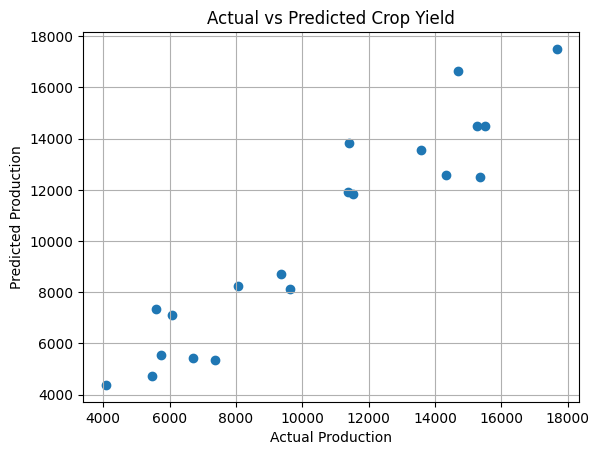

R² Score: 0.8913951703019795


In [16]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title("Actual vs Predicted Crop Yield")
plt.grid(True)
plt.show()

print("R² Score:", r2_score(y_test, y_pred))

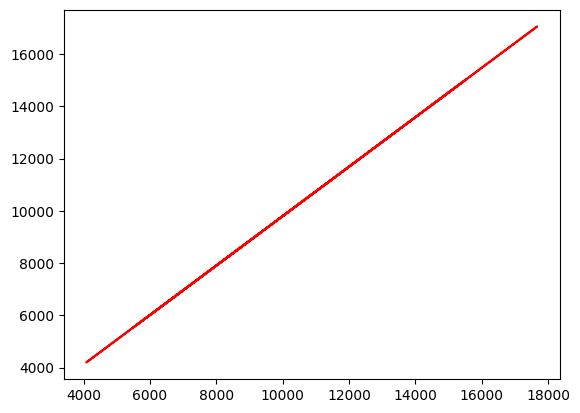

In [17]:
import numpy as np
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red')  # best-fit line
